# Online Sales

# Notebooks

In [1]:
import pandas as pd
import beautifulplots as bp
print(f'beautifulplots version = {bp.__version__}')

beautifulplots version = 0.2.6


# Load Data

In [2]:
datapath = "../data"
df_sales = pd.read_csv(f'{datapath}/Superstore_subcatsales_2017_cdp.csv', parse_dates = ["Order Date"])
display(df_sales.head(10))

print(f'date min = {df_sales["Order Date"].min()}')
print(f'date max = {df_sales["Order Date"].max()}')
print(f'N rows (sales) = {df_sales.shape[0]}')
print( f'N Sub-Catetories = {df_sales.groupby("Sub-Category")["Sales"].count().count()} ')

,Order Date,Category,Sub-Category,Sales,Quantity
0,2014-01-03,Office Supplies,Paper,16.448,2.0
1,2014-01-04,Office Supplies,Labels,11.784,3.0
2,2014-01-04,Office Supplies,Binders,3.540,2.0
3,2014-01-04,Office Supplies,Paper,0.000,0.0
4,2014-01-04,Office Supplies,Storage,272.736,3.0
5,2014-01-05,Office Supplies,Labels,0.000,0.0
6,2014-01-05,Office Supplies,Binders,0.000,0.0
7,2014-01-05,Office Supplies,Paper,0.000,0.0
8,2014-01-05,Office Supplies,Art,19.536,3.0
9,2014-01-05,Office Supplies,Storage,0.000,0.0


date min = 2014-01-03 00:00:00
date max = 2017-12-30 00:00:00
N rows (sales) = 24431
N Sub-Catetories = 17 


In [3]:
aggs = {
    "Sales":"sum",
    "Quantity":"sum"  
}

df_catsales = df_sales.groupby(["Order Date" , "Category"]).agg(aggs).reset_index()
df_catsales.head(10)

,Order Date,Category,Sales,Quantity
0,2014-01-03,Office Supplies,16.448,2.0
1,2014-01-04,Office Supplies,288.060,8.0
2,2014-01-05,Office Supplies,19.536,3.0
3,2014-01-06,Furniture,2573.820,9.0
4,2014-01-06,Office Supplies,685.340,15.0
5,2014-01-06,Technology,1147.940,6.0
6,2014-01-07,Furniture,76.728,3.0
7,2014-01-07,Office Supplies,10.430,7.0
8,2014-01-07,Technology,0.000,0.0
9,2014-01-08,Furniture,0.000,0.0


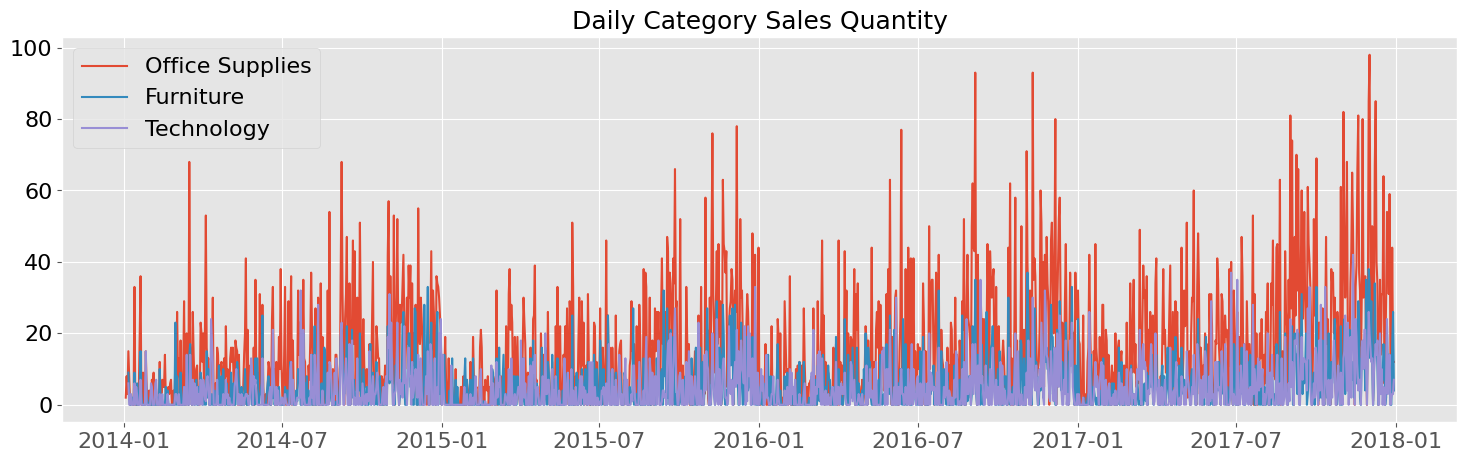

In [4]:
bp.lineplot(df_catsales,x="Order Date",y="Quantity",hue="Category",  y_axis_format = ",.0f" ,   title = "Daily Category Sales Quantity", figsize=(18,5))